In [1]:
# dimostrazione overfitting ed underfitting
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.datasets import reuters
from keras import models, layers, losses
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data()

In [3]:
# Data preprocessing
num_classes = np.amax(y_train) + 1          # Usato per garantire coerenza tra y_train ed y_test
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Modello ad un layer con 8 neuroni
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam',
            loss=losses.CategoricalCrossentropy(),
            metrics=['acc'])

history=model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test))

Epoch 1/10
281/281 [==============================] - 5s 8ms/step - loss: 2.4238 - acc: 0.4475 - val_loss: 1.6951 - val_acc: 0.6167
Epoch 2/10
281/281 [==============================] - 2s 6ms/step - loss: 1.4813 - acc: 0.6656 - val_loss: 1.4097 - val_acc: 0.6768
Epoch 3/10
281/281 [==============================] - 2s 6ms/step - loss: 1.2570 - acc: 0.7081 - val_loss: 1.2998 - val_acc: 0.6923
Epoch 4/10
281/281 [==============================] - 2s 6ms/step - loss: 1.1388 - acc: 0.7337 - val_loss: 1.2375 - val_acc: 0.7106
Epoch 5/10
281/281 [==============================] - 2s 6ms/step - loss: 1.0535 - acc: 0.7575 - val_loss: 1.1937 - val_acc: 0.7248
Epoch 6/10
281/281 [==============================] - 2s 6ms/step - loss: 0.9859 - acc: 0.7749 - val_loss: 1.1546 - val_acc: 0.7337
Epoch 7/10
281/281 [==============================] - 2s 6ms/step - loss: 0.9290 - acc: 0.7878 - val_loss: 1.1350 - val_acc: 0.7422
Epoch 8/10
281/281 [==============================] - 2s 6ms/step - loss: 0.

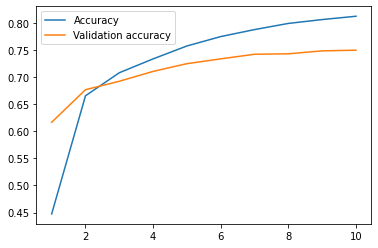

: 

In [12]:
import matplotlib.pyplot as plt

history_acc = history.history['acc']
history_val_acc = history.history['val_acc']

plt.plot(range(1, 11), history_acc, label='Accuracy')
plt.plot(range(1, 11), history_val_acc, label='Validation accuracy')
plt.legend()